In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn import datasets

# 选取鸢尾花数据集的后两个特征
iris = datasets.load_iris()
X = iris.data[:, 2:]
y = iris.target

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=666666)

In [12]:
X_train.shape

(120, 2)

In [13]:
y_train.shape

(120,)

### 用我们的决策树模型

In [14]:
from playML.DecisionTree import DecisionTree
# 导入本地封装的决策树模型

In [15]:
Dtree = DecisionTree()
Dtree.fit(X_train, y_train, max_depth=2)

DTree(criterion='entropy')

In [16]:
Dtree.score(X_test, y_test)

0.9

### 用 sklearn 的决策树模型

In [22]:
from sklearn.tree import DecisionTreeClassifier
dt_clf = DecisionTreeClassifier(max_depth=2, criterion="entropy", random_state=42)
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=42)

In [23]:
dt_clf.score(X_test, y_test)

0.9

### 画图对比

In [24]:
def plot_decision_boundary(model, axis):
    
    x0, x1 = np.meshgrid(
        np.linspace(axis[0], axis[1], int((axis[1]-axis[0])*100)).reshape(-1, 1),
        np.linspace(axis[2], axis[3], int((axis[3]-axis[2])*100)).reshape(-1, 1),
    )
    X_new = np.c_[x0.ravel(), x1.ravel()]

    y_predict = model.predict(X_new)
    zz = y_predict.reshape(x0.shape)

    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(['#EF9A9A','#FFF59D','#90CAF9'])
    
    plt.contourf(x0, x1, zz, cmap=custom_cmap)

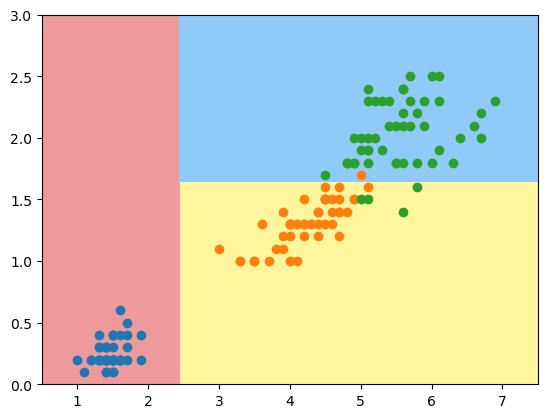

In [25]:
plot_decision_boundary(dt_clf, axis=[0.5, 7.5, 0, 3])
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.scatter(X[y==2,0], X[y==2,1])
plt.show()

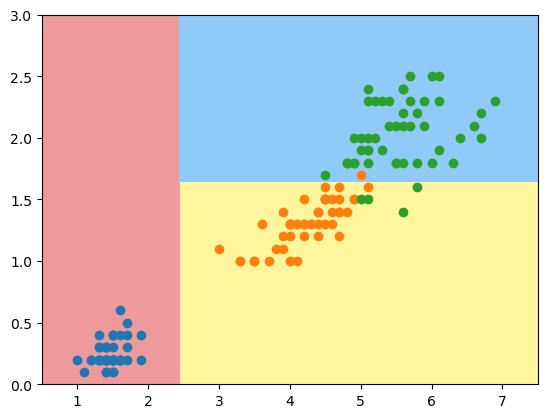

In [26]:
plot_decision_boundary(Dtree, axis=[0.5, 7.5, 0, 3])
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.scatter(X[y==2,0], X[y==2,1])
plt.show()

## 完全一致！太牛了